In [1]:
from pathlib import Path
from sqlalchemy import create_engine
import pandas as pd
import sqlite3
import json
from census import Census

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Necessary Imports
import pandas as pd

# Read in the excel file
sheets = ['Coal','Natural Gas','Petroleum','Nuclear','Total Renewable Energy']


energy_consumption= pd.read_excel('use_energy_source.xlsx',sheet_name=sheets,index_col=None,header=2)

In [3]:
energy_consumption['Coal'].head()


,State,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AK,7189,11552,13559,11999,12029,9888,16431,18462,15998,...,15521,14819,18225,19511,16613,16376,17325,17620,18527,18694
1,AL,395400,382455,427177,442465,459000,533142,583457,580163,618335,...,547004,565051,575912,494311,410168,378890,377152,317180,256687,309791
2,AR,356,275,160,135,186,163,111,104,132,...,296732,327099,339214,226889,246437,267591,304145,239798,161980,216123
3,AZ,210,211,6291,8432,9103,7030,7373,7184,8137,...,420570,454865,447849,385822,323878,334512,331492,257727,156821,160299
4,CA,35903,59106,39681,46127,53723,63693,51515,53949,57011,...,43832,38151,39486,30967,32077,33663,33256,30886,28034,28244


In [4]:
# Review one of the dataframes in the variable
coal = energy_consumption['Coal']

coal_energy = coal[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]


In [5]:
coal_energy.head()

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527
1,AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687
2,AR,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980
3,AZ,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821
4,CA,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034


In [6]:
coal_energy = coal_energy.rename(columns = {2011:'2011(C)',2012:'2012(C)',2013:'2013(C)',2014:'2014(C)',2015:'2015(C)',2016:'2016(C)',2017:'2017(C)',2018:'2018(C)',2019:'2019(C)',2020:'2020(C)'})
coal_energy = coal_energy.set_index('State')
coal_energy.drop(index='US', inplace=True)
coal_energy.tail()


,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C)
State,,,,,,,,,,
VT,0,0,0,0,0,0,0,0,0,0
WA,56951,42656,74955,76547,58273,53302,61732,61166,80837,59443
WI,447370,373281,454554,417096,408189,357335,388614,362077,280108,249316
WV,822645,756716,771188,816460,730949,751957,710445,661760,621722,539707
WY,467671,490128,520699,489300,487177,457315,458496,455748,410221,388253


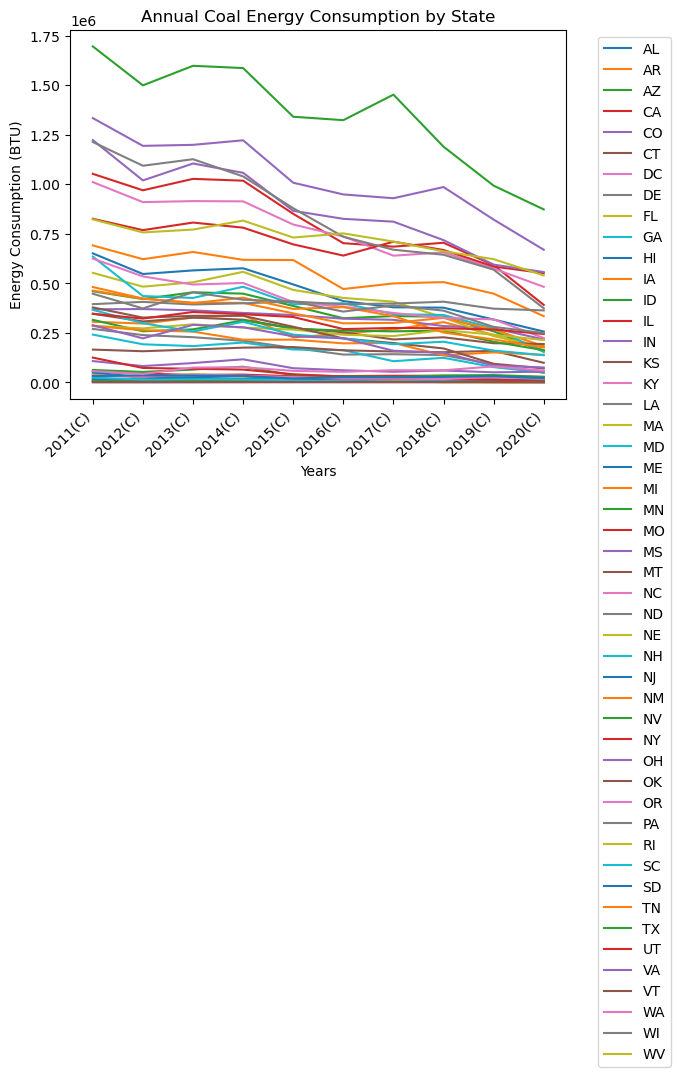

In [7]:
# Iterate over each row (excluding the first row) and plot each row individually
for index, row in coal_energy.iloc[1:-1].iterrows():
    row.plot(label=index)

# Add legend and display the plot
plt.xlabel('Years')
plt.ylabel('Energy Consumption (BTU)')
plt.title('Annual Coal Energy Consumption by State')
plt.xticks(range(len(coal_energy.columns)), coal_energy.columns, rotation=45, ha='right')

# Export plots as png file
plt.savefig("energy_by_types_visuals/annual_coal_consumption.png", format="png", bbox_inches='tight')

# Add legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

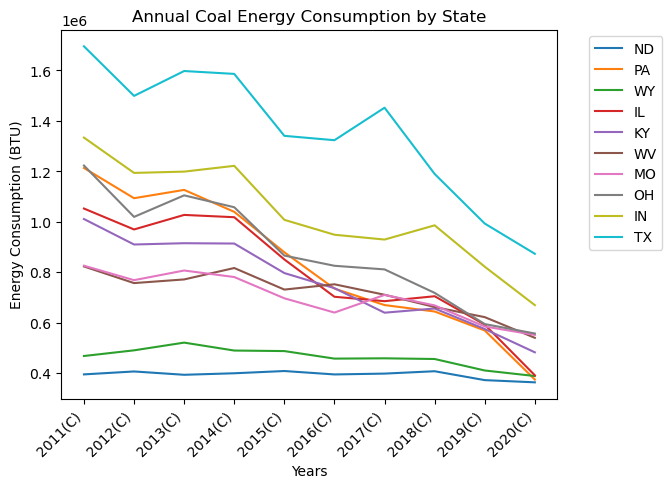

In [8]:
# Sort the DataFrame based on the '2020(C)' column
sorted_coal_energy = coal_energy.sort_values(by='2020(C)')

# Select the top 10 states with the highest values for '2020(C)'
top_10_states = sorted_coal_energy.tail(10)

# Plot the data for the top 10 states
for index, row in top_10_states.iterrows():
    row.plot(label=index)
    
# Add legend and display the plot
plt.xlabel('Years')
plt.ylabel('Energy Consumption (BTU)')
plt.title('Annual Coal Energy Consumption by State')

# Add xticks for each index and tilt the labels
plt.xticks(range(len(coal_energy.columns)), coal_energy.columns, rotation=45, ha='right')

# Add legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Export plots as png file
plt.savefig("energy_by_types_visuals/annual_coal_consumption_top_10_US.png", format="png", bbox_inches='tight')

# Display the plot
plt.show()


In [9]:
gas = energy_consumption['Natural Gas']
gas_energy = gas[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]

gas_energy = gas_energy.set_index('State')
gas_energy.drop(index='US', inplace=True)

gas_energy.head()


,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,
AK,339819,347228,332631,329274,333936,330883,343899,346255,343384,373567
AL,609288,677380,625869,650570,701582,715033,681208,771194,748731,714871
AR,288906,300572,288045,273009,296826,315617,317530,366939,371388,335441
AZ,293134,339043,340375,315916,365313,373916,334629,400531,484249,513539
CA,2196252,2456371,2480792,2409574,2384061,2248939,2190994,2209801,2218732,2151068


In [10]:
gas_energy = gas_energy.rename(columns = {2011:'2011(G)',2012:'2012(G)',2013:'2013(G)',2014:'2014(G)',2015:'2015(G)',2016:'2016(G)',2017:'2017(G)',2018:'2018(G)',2019:'2019(G)',2020:'2020(G)'})
gas_energy.tail()


,2011(G),2012(G),2013(G),2014(G),2015(G),2016(G),2017(G),2018(G),2019(G),2020(G)
State,,,,,,,,,,
VT,8677,8287,9743,10853,12245,12383,12281,14208,14381,13589
WA,272261,271947,327840,320167,327738,324929,350872,334779,378216,354969
WI,399247,410305,454050,479396,476969,501042,504808,565291,592529,571817
WV,124935,140133,152880,180222,191059,188491,199298,221402,239854,265123
WY,161776,158546,156110,142268,126421,132478,158370,175639,172235,169076


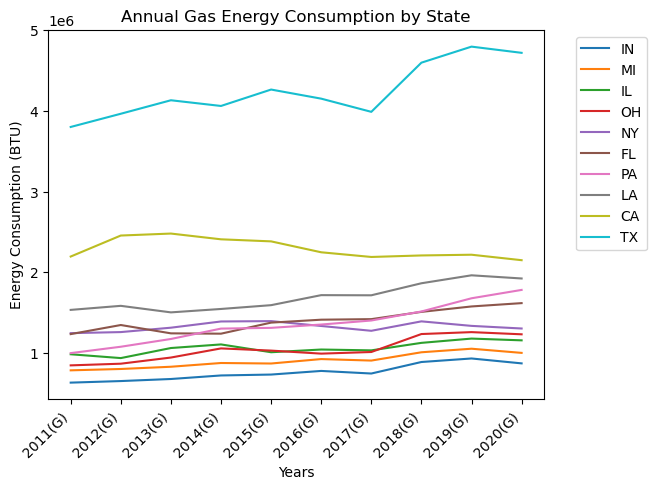

In [11]:
# Sort the DataFrame based on the '2020(G)' column
sorted_gas_energy = gas_energy.sort_values(by='2020(G)')

# Select the top 10 states with the highest values for '2020(G)'
top_10_states = sorted_gas_energy.tail(10)

# Plot the data for the top 10 states
for index, row in top_10_states.iterrows():
    row.plot(label=index)

# Add legend and display the plot
plt.xlabel('Years')
plt.ylabel('Energy Consumption (BTU)')
plt.title('Annual Gas Energy Consumption by State')

# Add xticks for each index and tilt the labels
plt.xticks(range(len(gas_energy.columns)), gas_energy.columns, rotation=45, ha='right')

# Add legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Export plots as png file
plt.savefig("energy_by_types_visuals/annual_gas_consumption_top_10_US.png", format="png", bbox_inches='tight') 

# Display the plot
plt.show()


In [12]:
petroleum = energy_consumption['Petroleum']
petroleum_energy = petroleum[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]

petroleum_energy = petroleum_energy.set_index('State')
petroleum_energy.drop(index='US', inplace=True)

In [13]:
petroleum_energy = petroleum_energy.rename(columns = {2011:'2011(P)',2012:'2012(P)',2013:'2013(P)',2014:'2014(P)',2015:'2015(P)',2016:'2016(P)',2017:'2017(P)',2018:'2018(P)',2019:'2019(P)',2020:'2020(P)'})
petroleum_energy.tail()


,2011(P),2012(P),2013(P),2014(P),2015(P),2016(P),2017(P),2018(P),2019(P),2020(P)
State,,,,,,,,,,
VT,79938,75387,78655,79824,81888,77727,77379,75792,77367,70379
WA,694946,697816,698425,681853,732667,800690,769685,775777,794537,621358
WI,516508,501822,510487,543179,534079,524098,523110,548839,547523,493092
WV,199665,194403,195225,193011,189690,199199,191481,216968,208371,179259
WY,168323,172121,161686,171012,158389,152624,153755,159048,155232,138481


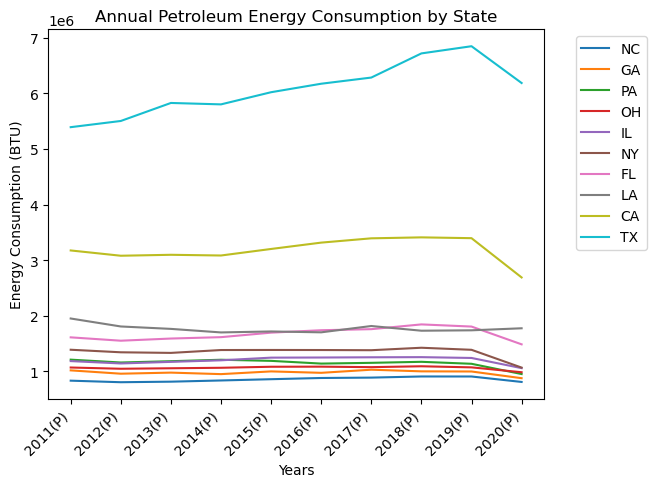

In [14]:
# Sort the DataFrame based on the '2020(P)' column
sorted_petroleum_energy = petroleum_energy.sort_values(by='2020(P)')

# Select the top 10 states with the highest values for '2020(P)'
top_10_states = sorted_petroleum_energy.tail(10)

# Plot the data for the top 10 states
for index, row in top_10_states.iterrows():
    row.plot(label=index)
    
# Add legend and display the plot
plt.xlabel('Years')
plt.ylabel('Energy Consumption (BTU)')
plt.title('Annual Petroleum Energy Consumption by State')

# Add xticks for each index and tilt the labels
plt.xticks(range(len(petroleum_energy.columns)), petroleum_energy.columns, rotation=45, ha='right')

# Add legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Export plots as png file
plt.savefig("energy_by_types_visuals/annual_petroleum_consumption_top_10_US.png", format="png", bbox_inches='tight') 

# Display the plot
plt.show()


In [15]:
nuclear= energy_consumption['Nuclear']
nuclear_energy = nuclear[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]

nuclear_energy = nuclear_energy.set_index('State')
nuclear_energy.drop(index='US', inplace=True)


In [16]:
nuclear_energy = nuclear_energy.rename(columns = {2011:'2011(N)',2012:'2012(N)',2013:'2013(N)',2014:'2014(N)',2015:'2015(N)',2016:'2016(N)',2017:'2017(N)',2018:'2018(N)',2019:'2019(N)',2020:'2020(N)'})
nuclear_energy.tail()


,2011(N),2012(N),2013(N),2014(N),2015(N),2016(N),2017(N),2018(N),2019(N),2020(N)
State,,,,,,,,,,
VT,51351,52283,50639,52929,0,0,0,0,0,0
WA,50293,97808,88408,99332,85347,100674,85013,101502,92584,98475
WI,120962,149845,121994,98807,104666,106173,100919,105900,104736,102071
WV,0,0,0,0,0,0,0,0,0,0
WY,0,0,0,0,0,0,0,0,0,0


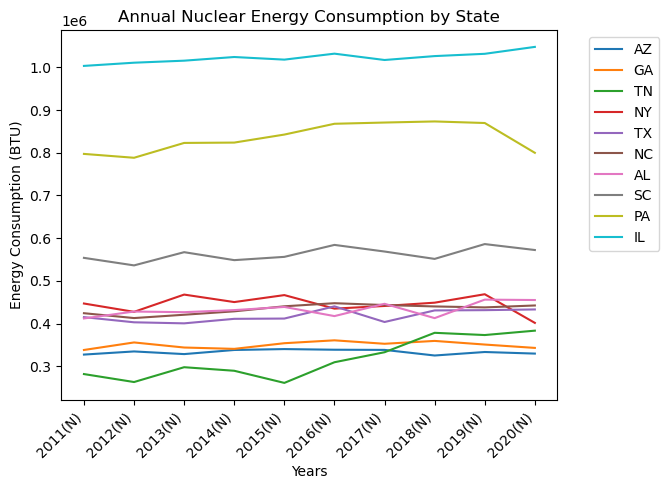

In [17]:
# Sort the DataFrame based on the '2020(N)' column
sorted_nuclear_energy = nuclear_energy.sort_values(by='2020(N)')

# Select the top 10 states with the highest values for '2020(N)'
top_10_states = sorted_nuclear_energy.tail(10)

# Plot the data for the top 10 states
for index, row in top_10_states.iterrows():
    row.plot(label=index)
    
# Add legend and display the plot
plt.xlabel('Years')
plt.ylabel('Energy Consumption (BTU)')
plt.title('Annual Nuclear Energy Consumption by State')

# Add xticks for each index and tilt the labels
plt.xticks(range(len(nuclear_energy.columns)), nuclear_energy.columns, rotation=45, ha='right')

# Add legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Export plots as png file
plt.savefig("energy_by_types_visuals/annual_nuclear_consumption_top_10_US.png", format="png", bbox_inches='tight')

# Display the plot
plt.show()


In [18]:
CG_merged_df = pd.merge(coal_energy,gas_energy, left_index=True, right_index=True)
CG_merged_df.head()

,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C),2011(G),2012(G),2013(G),2014(G),2015(G),2016(G),2017(G),2018(G),2019(G),2020(G)
State,,,,,,,,,,,,,,,,,,,,
AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527,339819,347228,332631,329274,333936,330883,343899,346255,343384,373567
AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687,609288,677380,625869,650570,701582,715033,681208,771194,748731,714871
AR,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980,288906,300572,288045,273009,296826,315617,317530,366939,371388,335441
AZ,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821,293134,339043,340375,315916,365313,373916,334629,400531,484249,513539
CA,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034,2196252,2456371,2480792,2409574,2384061,2248939,2190994,2209801,2218732,2151068


In [19]:
PCG_merged_df = pd.merge(CG_merged_df,petroleum_energy, left_index=True, right_index=True)
PCG_merged_df.head()

,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C),...,2011(P),2012(P),2013(P),2014(P),2015(P),2016(P),2017(P),2018(P),2019(P),2020(P)
State,,,,,,,,,,,,,,,,,,,,,
AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527,...,268848,250063,230765,226102,235839,219837,216452,215613,220818,222323
AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687,...,521337,513993,492294,490328,511742,538953,530370,518687,529319,525878
AR,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980,...,337961,321213,321254,325319,314414,322808,321210,326432,330550,315440
AZ,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821,...,552991,538460,543380,543552,557369,576213,583258,590247,607131,544270
CA,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034,...,3174345,3079327,3096230,3083503,3201112,3315378,3392689,3409954,3395439,2688622


In [20]:
NPCG_energy_df = pd.merge(PCG_merged_df,nuclear_energy, left_index=True, right_index=True)
NPCG_energy_df.head()

,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),2020(C),...,2011(N),2012(N),2013(N),2014(N),2015(N),2016(N),2017(N),2018(N),2019(N),2020(N)
State,,,,,,,,,,,,,,,,,,,,,
AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,18527,...,0,0,0,0,0,0,0,0,0,0
AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,256687,...,411822,427975,426488,431368,438728,417334,446097,412584,455865,454930
AR,306119,296732,327099,339214,226889,246437,267591,304145,239798,161980,...,148531,162353,124816,151428,144716,140370,132736,132996,141750,157349
AZ,459909,420570,454865,447849,385822,323878,334512,331492,257727,156821,...,327292,334636,328423,338044,340153,338636,338246,325122,333312,329597
CA,55264,43832,38151,39486,30967,32077,33663,33256,30886,28034,...,383644,193939,187162,177656,193529,197754,187227,190422,168799,169838


In [21]:
energy_and_weather = pd.read_csv('summarized_energy_and_weather.csv')
energy_and_weather.drop(energy_and_weather.columns[0], axis=1, inplace=True)

energy_and_weather.head()

,latitude,longitude,State,State Abbr,region,sub-region,country,year,max_temp_avg,min_temp_avg,...,2011-Total,2012-Total,2013-Total,2014-Total,2015-Total,2016-Total,2017-Total,2018-Total,2019-Total,2020-Total
0,32.794376,-86.809296,Alabama,AL,South,East South Central,US,2011,75.407080,57.373630,...,247345.1,243231.6,244656.5,244206.8,243072.8,234100.1,232164.6,238078.7,234964.0,226057.5
1,32.794376,-86.809296,Alabama,AL,South,East South Central,US,2012,75.691760,58.606080,...,247345.1,243231.6,244656.5,244206.8,243072.8,234100.1,232164.6,238078.7,234964.0,226057.5
2,32.794376,-86.809296,Alabama,AL,South,East South Central,US,2013,72.584785,56.442932,...,247345.1,243231.6,244656.5,244206.8,243072.8,234100.1,232164.6,238078.7,234964.0,226057.5
3,32.794376,-86.809296,Alabama,AL,South,East South Central,US,2014,72.776985,55.313313,...,247345.1,243231.6,244656.5,244206.8,243072.8,234100.1,232164.6,238078.7,234964.0,226057.5
4,32.794376,-86.809296,Alabama,AL,South,East South Central,US,2015,74.550210,58.338010,...,247345.1,243231.6,244656.5,244206.8,243072.8,234100.1,232164.6,238078.7,234964.0,226057.5


In [22]:
# Initialize an empty dictionary to store the sums for each state and year
state_year_sums = {}

# Iterate through the DataFrame
for index, row in energy_and_weather.iterrows():
    state = row['State']  # Get the state name
    year = row['year']    # Get the year
    
    # Get the column name for fossil fuel data in the format 'Year-(Fossil)'
    column_name = f"{year}-(Fossil)"
    
    # Check if the state is already in the dictionary
    if state in state_year_sums:
        # If the state is in the dictionary, add the value to the existing sum for the year
        state_year_sums[state][column_name] = state_year_sums[state].get(column_name, 0) + row[column_name]
    else:
        # If the state is not in the dictionary, initialize the sum for the year
        state_year_sums[state] = {column_name: row[column_name]}

# Create a DataFrame from the dictionary
fossil_totals_df = pd.DataFrame.from_dict(state_year_sums, orient='index').reset_index()

# Rename the 'index' column to 'State'
fossil_totals_df.rename(columns={'index': 'State'}, inplace=True)

# Dictionary mapping state names to abbreviations
state_abbr = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY',
 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
  'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# Add a new column with state abbreviations
fossil_totals_df['State Abbr'] = state_abbr

# Reset the index to 'State'
fossil_totals_df = fossil_totals_df.set_index('State Abbr')

# Drop the 'State' column
fossil_totals_df.drop('State', axis=1, inplace=True)


# Print the new DataFrame
fossil_totals_df.head()


,2011-(Fossil),2012-(Fossil),2013-(Fossil),2014-(Fossil),2015-(Fossil),2016-(Fossil),2017-(Fossil),2018-(Fossil),2019-(Fossil),2020-(Fossil)
State Abbr,,,,,,,,,,
AL,219347.9,216635.2,210970.2,214817.8,214636.3,208148.8,203656.5,207961.7,205109.5,195236.6
AK,62414.8,61281.2,57821.5,57360.1,58928.6,56733.3,57672.7,57919.3,58182.2,61441.7
AZ,163332.6,163270.9,166704.3,164536.1,164865.7,161264.3,159064.5,164739.2,168241.9,154422.7
AR,108151.7,108087.0,106121.4,108897.0,98284.5,102523.2,103906.7,113051.2,108348.6,97021.0
CA,580950.5,577346.9,580233.5,571021.9,580966.9,579414.8,580457.3,584343.3,581385.6,503756.2


In [ ]:
# Sort the DataFrame based on the '2020-(Fossil)' column
sorted_fossil_fuels_energy = fossil_totals_df.sort_values(by='2020-(Fossil)')

# Select the top 10 states with the highest values for '2020-(Fossil)'
top_10_states = sorted_fossil_fuels_energy.tail(10)

# Plot the data for the top 10 states
for index, row in top_10_states.iterrows():
    row.plot(label=index)
    
# Add legend and display the plot
plt.xlabel('Years')
plt.ylabel('Energy Consumption (BTU)')
plt.title('Annual Total Fossil Fuel Energy Consumption by State')

# Add xticks for each index and tilt the labels
plt.xticks(range(len(fossil_totals_df.columns)), fossil_totals_df.columns, rotation=45, ha='right')

# Add legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Export plots as png file
plt.savefig("energy_by_types_visuals/annual_total_fossil_fuel_consumption_top_10_US.png", format="png", bbox_inches='tight')

# Display the plot
plt.show()

# Export plots as png files
plt.savefig("energy_by_types_visuals/annual_total_fossil_fuel_consumption_top_10_US.png")

In [ ]:
total_renewable = energy_consumption['Total Renewable Energy']
total_renewable = total_renewable[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
total_renewable = total_renewable.set_index('State')
total_renewable.drop(index='US', inplace=True)
total_renewable.head()


In [ ]:
total_renewable = total_renewable.rename(columns = {2011:'2011(TR)',2012:'2012(TR)',2013:'2013(TR)',2014:'2014(TR)',2015:'2015(TR)',2016:'2016(TR)',2017:'2017(TR)',2018:'2018(TR)',2019:'2019(TR)',2020:'2020(TR)'})
total_renewable.tail()

In [ ]:
# Sort the DataFrame based on the '2020(TR)' column
sorted_total_renewable_energy = total_renewable.sort_values(by='2020(TR)')

# Select the top 10 states with the highest values for '2020(TR)'
top_10_states = sorted_total_renewable_energy.tail(10)

# Plot the data for the top 10 states
for index, row in top_10_states.iterrows():
    row.plot(label=index)
    
# Add legend and display the plot
plt.xlabel('Years')
plt.ylabel('Energy Consumption (BTU)')
plt.title('Annual Total Renewable Energy Consumption by State')

# Add xticks for each index and tilt the labels
plt.xticks(range(len(total_renewable.columns)), total_renewable.columns, rotation=45, ha='right')

# Add legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Export plots as png file
plt.savefig("energy_by_types_visuals/annual_total_renewable_consumption_top_10_US.png", format="png", bbox_inches='tight') 

# Display the plot
plt.show()


In [ ]:
# Read the use_renew_sector.xlsx excel file 
sheets = ['Contents', 'Biomass', 'Geothermal', 'Hydropower', 'Solar Energy', 'Wind Energy']

renewable_data = pd.read_excel('use_renew_sector.xlsx', sheet_name=sheets, index_col=None, header=2)

In [ ]:
biomass = renewable_data['Biomass']
biomass_energy = biomass[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
biomass_energy = biomass_energy.set_index('State')
biomass_energy.drop(index='US', inplace=True)
biomass_energy.head()

In [ ]:
biomass_energy = biomass_energy.rename(columns={2011:'2011(BM)',
                                        2012:'2012(BM)',
                                        2013:'2013(BM)',
                                        2014:'2014(BM)',
                                        2015:'2015(BM)',
                                        2016:'2016(BM)',
                                        2017:'2017(BM)',
                                        2018:'2018(BM)',
                                        2019:'2019(BM)',
                                        2020:'2020(BM)'})
biomass_energy.tail()

In [ ]:
# Sort the DataFrame based on the '2020(BM)' column
sorted_biomass_energy = biomass_energy.sort_values(by='2020(BM)')

# Select the top 10 states with the highest values for '2020(BM)'
top_10_states = sorted_biomass_energy.tail(10)

# Plot the data for the top 10 states
for index, row in top_10_states.iterrows():
    row.plot(label=index)
    
# Add legend and display the plot
plt.xlabel('Years')
plt.ylabel('Energy Consumption (BTU)')
plt.title('Annual Biomass Energy Consumption by State')

# Add xticks for each index and tilt the labels
plt.xticks(range(len(biomass_energy.columns)), biomass_energy.columns, rotation=45, ha='right')

# Add legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Export plots as png file
plt.savefig("energy_by_types_visuals/annual_biomass_consumption_top_10_US.png", format="png", bbox_inches='tight')

# Display the plot
plt.show()


In [ ]:
geothermal = renewable_data['Geothermal']
geothermal_energy = geothermal[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
geothermal_energy = geothermal_energy.set_index('State')
geothermal_energy.drop(index='US', inplace=True)
geothermal_energy.head()

In [ ]:
geothermal_energy = geothermal_energy.rename(columns={2011:'2011(GT)',
                                        2012:'2012(GT)',
                                        2013:'2013(GT)',
                                        2014:'2014(GT)',
                                        2015:'2015(GT)',
                                        2016:'2016(GT)',
                                        2017:'2017(GT)',
                                        2018:'2018(GT)',
                                        2019:'2019(GT)',
                                        2020:'2020(GT)'})
geothermal_energy.tail()

In [ ]:
# Sort the DataFrame based on the '2020(GT)' column
sorted_geothermal_energy = geothermal_energy.sort_values(by='2020(GT)')

# Select the top 10 states with the highest values for '2020(GT)'
top_10_states = sorted_geothermal_energy.tail(10)

# Plot the data for the top 10 states
for index, row in top_10_states.iterrows():
    row.plot(label=index)
    
# Add legend and display the plot
plt.xlabel('Years')
plt.ylabel('Energy Consumption (BTU)')
plt.title('Annual Geothermal Energy Consumption by State')

# Add xticks for each index and tilt the labels
plt.xticks(range(len(geothermal_energy.columns)), geothermal_energy.columns, rotation=45, ha='right')

# Add legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Export plots as png file
plt.savefig("energy_by_types_visuals/annual_geothermal_consumption_top_10_US.png", format="png", bbox_inches='tight')

# Display the plot
plt.show()


In [ ]:
hydropower = renewable_data['Hydropower']
hydropower_energy = hydropower[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
hydropower_energy = hydropower_energy.set_index('State')
hydropower_energy.drop(index='US', inplace=True)
hydropower_energy.head()

In [ ]:
hydropower_energy = hydropower_energy.rename(columns={2011:'2011(HP)',
                                        2012:'2012(HP)',
                                        2013:'2013(HP)',
                                        2014:'2014(HP)',
                                        2015:'2015(HP)',
                                        2016:'2016(HP)',
                                        2017:'2017(HP)',
                                        2018:'2018(HP)',
                                        2019:'2019(HP)',
                                        2020:'2020(HP)'})
hydropower_energy.tail()

In [ ]:
# Sort the DataFrame based on the '2020(HP)' column
sorted_hydropower_energy = hydropower_energy.sort_values(by='2020(HP)')

# Select the top 10 states with the highest values for '2020(HP)'
top_10_states = sorted_hydropower_energy.tail(10)

# Plot the data for the top 10 states
for index, row in top_10_states.iterrows():
    row.plot(label=index)

# Add legend and display the plot
plt.xlabel('Years')
plt.ylabel('Energy Consumption (BTU)')
plt.title('Annual Hydropower Energy Consumption by State')

# Add xticks for each index and tilt the labels
plt.xticks(range(len(hydropower_energy.columns)), hydropower_energy.columns, rotation=45, ha='right')

# Add legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Export plots as png file
plt.savefig("energy_by_types_visuals/annual_hydropower_consumption_top_10_US.png", format="png", bbox_inches='tight')

# Display the plot
plt.show()


In [ ]:
solar = renewable_data['Solar Energy']
solar_energy = solar[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
solar_energy = solar_energy.set_index('State')
solar_energy.drop(index='US', inplace=True)
solar_energy.head()

In [ ]:
solar_energy = solar_energy.rename(columns={2011:'2011(S)',
                                        2012:'2012(S)',
                                        2013:'2013(S)',
                                        2014:'2014(S)',
                                        2015:'2015(S)',
                                        2016:'2016(S)',
                                        2017:'2017(S)',
                                        2018:'2018(S)',
                                        2019:'2019(S)',
                                        2020:'2020(S)'})
solar_energy.tail()

In [ ]:
# Sort the DataFrame based on the '2020(S)' column
sorted_solar_energy = solar_energy.sort_values(by='2020(S)')

# Select the top 10 states with the highest values for '2020(S)'
top_10_states = sorted_solar_energy.tail(10)

# Plot the data for the top 10 states
for index, row in top_10_states.iterrows():
    row.plot(label=index)
    
# Add legend and display the plot
plt.xlabel('Years')
plt.ylabel('Energy Consumption (BTU)')
plt.title('Annual Solar Energy Consumption by State')

# Add xticks for each index and tilt the labels
plt.xticks(range(len(solar_energy.columns)), solar_energy.columns, rotation=45, ha='right')

# Add legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Export plots as png file
plt.savefig("energy_by_types_visuals/annual_solar_consumption_top_10_US.png", format="png", bbox_inches='tight')

# Display the plot
plt.show()


In [ ]:
wind = renewable_data['Wind Energy']
wind_energy = wind[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
wind_energy = wind_energy.set_index('State')
wind_energy.drop(index='US', inplace=True)
wind_energy.head()

In [ ]:
wind_energy = wind_energy.rename(columns={2011:'2011(W)',
                                        2012:'2012(W)',
                                        2013:'2013(W)',
                                        2014:'2014(W)',
                                        2015:'2015(W)',
                                        2016:'2016(W)',
                                        2017:'2017(W)',
                                        2018:'2018(W)',
                                        2019:'2019(W)',
                                        2020:'2020(W)'})
wind_energy.tail()

In [ ]:
# Sort the DataFrame based on the '2020(W)' column
sorted_wind_energy = wind_energy.sort_values(by='2020(W)')

# Select the top 10 states with the highest values for '2020(W)'
top_10_states = sorted_wind_energy.tail(10)

# Select the bottom 5 states with the lowest values for '2020(W)'
# bottom_5_states = sorted_wind_energy.head(5)

# Plot the data for the top 10 states
for index, row in top_10_states.iterrows():
    row.plot(label=index)

# Plot the data for the bottom 5 states
# for index, row in bottom_5_states.iterrows():
#     row.plot(label=index, color='gray')

    
# Add legend and display the plot
plt.xlabel('Years')
plt.ylabel('Energy Consumption (BTU)')
plt.title('Annual Wind Energy Consumption by State')

# Add xticks for each index and tilt the labels
plt.xticks(range(len(wind_energy.columns)), wind_energy.columns, rotation=45, ha='right')

# Add legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Export plots as png file
plt.savefig("energy_by_types_visuals/annual_wind_consumption_top_10_US.png", format="png", bbox_inches='tight')

# Display the plot
plt.show()

plt.tight_layout()



In [ ]:
# Initialize an empty dictionary to store the sums for each state and year
state_year_sums = {}

# Iterate through the DataFrame
for index, row in energy_and_weather.iterrows():
    state = row['State']  # Get the state name
    year = row['year']    # Get the year
    
    # Get the column name for fossil fuel data in the format 'Year-(Fossil)'
    column_name = f"{year}-Total"
    
    # Check if the state is already in the dictionary
    if state in state_year_sums:
        # If the state is in the dictionary, add the value to the existing sum for the year
        state_year_sums[state][column_name] = state_year_sums[state].get(column_name, 0) + row[column_name]
    else:
        # If the state is not in the dictionary, initialize the sum for the year
        state_year_sums[state] = {column_name: row[column_name]}

# Create a DataFrame from the dictionary
all_energy_totals_df = pd.DataFrame.from_dict(state_year_sums, orient='index').reset_index()

# Rename the 'index' column to 'State'
all_energy_totals_df.rename(columns={'index': 'State'}, inplace=True)

# Dictionary mapping state names to abbreviations
state_abbr = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY',
 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
  'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# Add a new column with state abbreviations
all_energy_totals_df['State Abbr'] = state_abbr

# Reset the index to 'State Abbreviation'
all_energy_totals_df = all_energy_totals_df.set_index('State Abbr')

# Drop the 'State' column
all_energy_totals_df.drop('State', axis=1, inplace=True)


# Print the new DataFrame
all_energy_totals_df.head()


In [ ]:
fossil_renewable_energy = pd.merge(fossil_totals_df, total_renewable, left_index=True, right_index=True)
fossil_renewable_energy.head()


In [ ]:
# all_energy = pd.merge(fossil_renewable_energy, all_energy_totals_df, left_index=True, right_index=True)
# all_energy_by_state = all_energy.copy()

# Dictionary mapping state names to abbreviations
state_abbr = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY',
 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
  'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# Add a new column with state abbreviations
fossil_renewable_energy['State Abbr'] = state_abbr

# Reset the index to 'State Abbreviation'
# all_energy_by_state = all_energy_by_state.set_index('State Abbr')

# all_energy_by_state = all_energy_by_state['State']
fossil_renewable_energy.head(2)

In [ ]:
# Dictionary to hold values for each year
result_dict = {'State Abbr': fossil_renewable_energy['State Abbr']}
for year in range(2011, 2021):
    year_col = str(year)
    fossil_col = year_col + '-(Fossil)'
    tr_col = year_col + '(TR)'
    
    fossil_divided = fossil_renewable_energy[fossil_col] / (fossil_renewable_energy[fossil_col] + fossil_renewable_energy[tr_col])
    tr_divided = fossil_renewable_energy[tr_col] / (fossil_renewable_energy[fossil_col] + fossil_renewable_energy[tr_col])
    
    result_dict[year_col + '-Fossil_Divided'] = fossil_divided
    result_dict[year_col + '-TR_Divided'] = tr_divided
    
    # Calculate 'Severity' for TR energy consumption
    tr_severity = []
    for tr_value in tr_divided:
        if tr_value < 0.51:
            tr_severity.append('0')
        else:
            tr_severity.append('1')
            
    result_dict[year_col + '-TR_Severity'] = tr_severity

# Create a new DataFrame from the dictionary
result_df = pd.DataFrame(result_dict)

result_df.head()

In [ ]:
# Pivot the DataFrame to create new columns for max_temp_avg, min_temp_avg, daylight_hr_avg, rain_av, and snowfall_avg for each year
energy_weather_pivot_df = energy_and_weather.pivot_table(index=['State', 'State Abbr', 'latitude', 'longitude', 'region', 'sub-region', 'country'], 
                          columns='year', 
                          values=['max_temp_avg', 'min_temp_avg', 'daylight_hr_avg', 'rain_avg', 'snowfall_avg'])

# Flatten the multi-level column index
energy_weather_pivot_df.columns = [f'{col[0]}_{col[1]}' for col in energy_weather_pivot_df.columns]

# Reset the index to make 'State', 'State Abbr', 'latitude', 'longitude', 'region', 'sub-region', 'country' as columns
energy_weather_pivot_df.reset_index(inplace=True)

# Reset the index to 'State Abbreviation'
energy_weather_pivot_df = energy_weather_pivot_df.set_index('State Abbr')

# Drop the 'State' column
# energy_weather_pivot_df.drop('State', axis=1, inplace=True)

energy_weather_pivot_df.head()

In [ ]:
energy_weather_severity_df = pd.merge(energy_weather_pivot_df, result_df, left_index=True, right_index=True)

# Drop the 'State Abbr' column
# energy_weather_pivot_df.drop('State Abbr', axis=1, inplace=True)
energy_weather_severity_df = energy_weather_severity_df.drop(columns=['State Abbr', 'State'])

energy_weather_severity_df.head()

In [ ]:
# Export the 'all_weather_all_energy_totals' as a CSV file
energy_weather_severity_df.to_csv('energy_weather_severity_df.csv', sep=',', index=True, encoding='utf-8')